# PCA处理泰坦尼克号数据

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('train.csv')
age_average=np.mean(data.iloc[:,5])
data.iloc[:,5].fillna(age_average,inplace=True)   
data.iloc[:,11].fillna(random.choice("SCQ"),inplace=True)          
data_array=np.array(data)
data_array[data_array=='female']=0
data_array[data_array=='male']=1
data_array[:,11][data_array[:,11]=='S']=0
data_array[:,11][data_array[:,11]=='C']=1
data_array[:,11][data_array[:,11]=='Q']=2
train_data=np.empty([891,7])
train_data[:,0]=data_array[:,2]
train_data[:,1:5]=data_array[:,4:8]
train_data[:,5]=data_array[:,9]
train_data[:,6]=data_array[:,11]

## 归一化处理

In [3]:
mean=train_data.mean(axis=0)
X_centered=(train_data-mean).T

### X_centered转换成归一化后的矩阵，维数为$7*891$

累计贡献率为0.9989568180050175


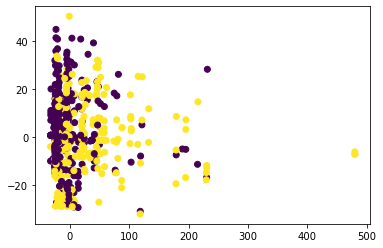

In [7]:
C=np.dot(X_centered,X_centered.T)
eigenvalue,featurevector=np.linalg.eig(C)
R=(eigenvalue[0]+eigenvalue[1])/eigenvalue.sum()
print('累计贡献率为'+str(R))
W=np.empty([7,2])
W[:,0]=featurevector[:,0]
W[:,1]=featurevector[:,1]
Y=np.dot(W.T,X_centered)
plt.scatter(Y.T[:,0], Y.T[:,1],c=data_array[:,1])
plt.show()